> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline
wc=pd.read_csv('wc_formatado.csv')

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

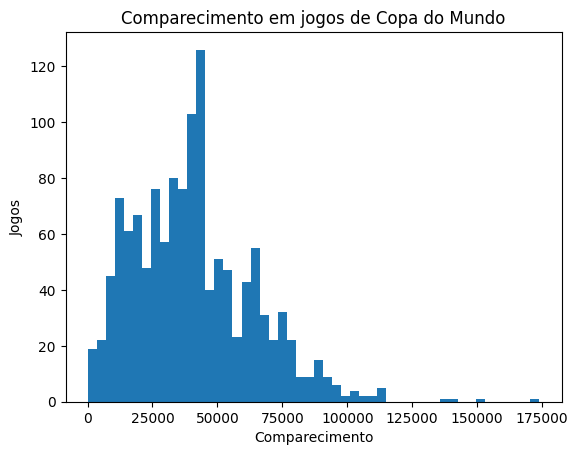

In [453]:
#### Solução com matplotlib
comparecimento2=wc['comparecimento'][wc['comparecimento']>0]
plt.hist(comparecimento2,bins=50)
plt.xlabel("Comparecimento")
plt.title('Comparecimento em jogos de Copa do Mundo')
plt.ylabel("Jogos")
plt.show()

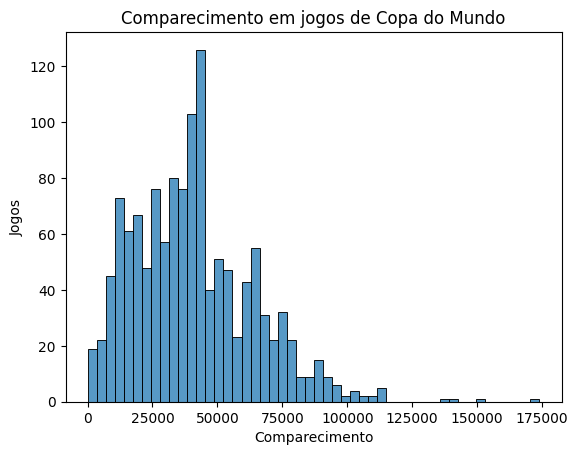

In [454]:
#### solução com seaborn
comparecimento2=wc['comparecimento'][wc['comparecimento']>0]
(
    sns.histplot(data=wc, x=comparecimento2, bins=50)
    ).set(title="Comparecimento em jogos de Copa do Mundo", xlabel="Comparecimento", ylabel="Jogos")
plt.show()



In [455]:
#### solução com plotly
comparecimento2=wc['comparecimento'][wc['comparecimento']>0]
fig = px.histogram(wc, x=comparecimento2, nbins=50, title="Comparecimento em jogos de Copa do Mundo",)
fig.update_xaxes(title_text='Comparecimento')
fig.update_yaxes(title_text="Jogos")
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

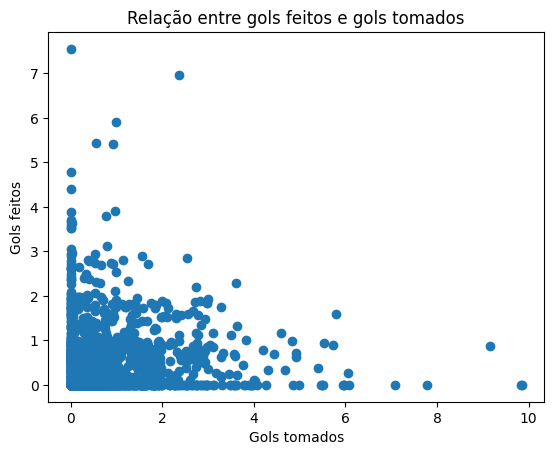

In [456]:
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
fig = plt.scatter(gols['gols_1'],gols["gols_2"])

plt.title("Relação entre gols feitos e gols tomados")
plt.xlabel("Gols tomados")
plt.ylabel("Gols feitos")
plt.show()


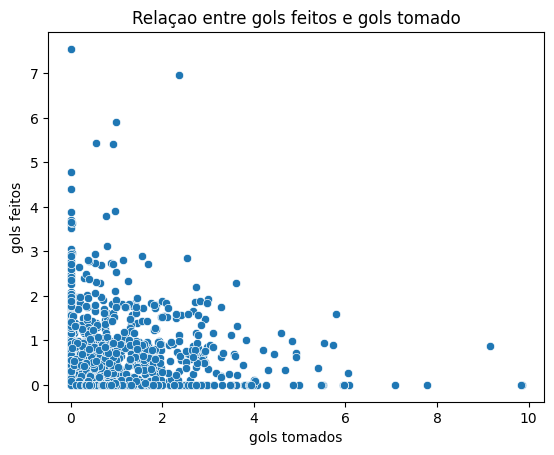

In [457]:
#### solução com seaborn
sns.scatterplot(data=gols, x=gols['gols_1'], y=gols['gols_2']).set(title='Relaçao entre gols feitos e gols tomado', xlabel='gols tomados', ylabel='gols feitos')
plt.show()

In [458]:
#### solução com plotly
fig= px.scatter(gols, x='gols_1', y='gols_2', title='Relação entre gols feitos e gols tomados')
fig.update_xaxes(title_text='Gols tomaods')
fig.update_yaxes(title_text="Gols feitos")
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

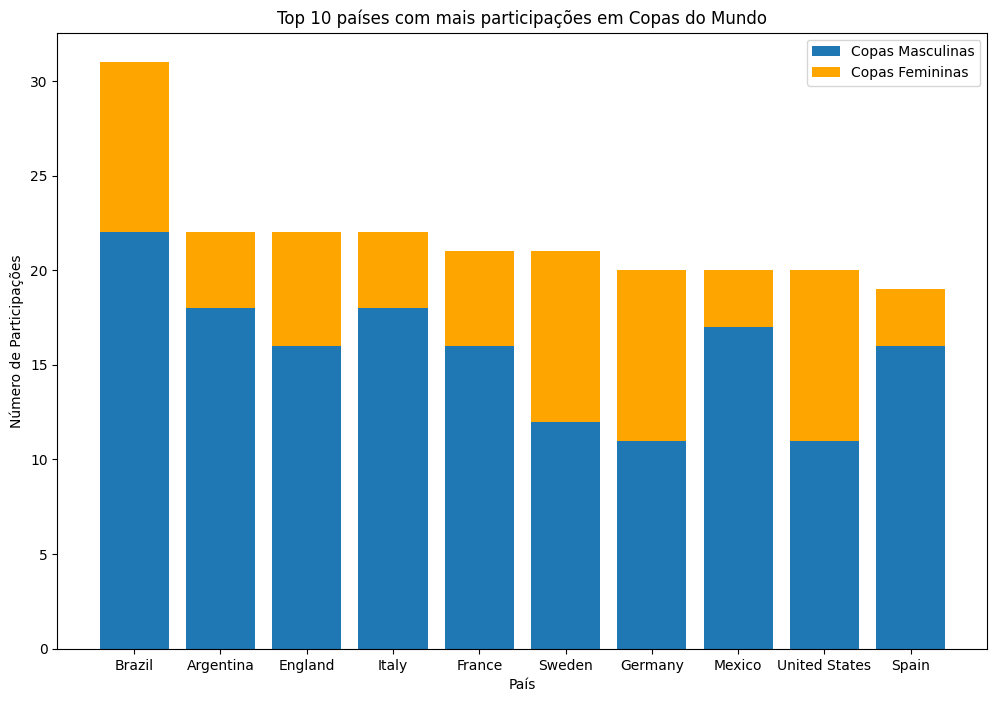

In [459]:
#### solução com matplotlib
países = pd.concat([
    wc[['time_1', 'copa', 'ano']].rename(columns={'time_1': 'país'}),
    wc[['time_2', 'copa', 'ano']].rename(columns={'time_2': 'país'})
])
participacao = países.drop_duplicates().groupby(['país', 'copa']).size().reset_index(name='num_copas')
participacao_total = países.drop_duplicates().groupby('país').size().reset_index(name='num_copas')

participacoes_feminina = participacao[participacao['copa'] == 'Feminina'][['país', 'num_copas']].rename(columns={'num_copas': 'participacoes_feminina'})
participacoes_masculina = participacao[participacao['copa'] == 'Masculina'][['país', 'num_copas']].rename(columns={'num_copas': 'participacoes_masculina'})

participacao_total = participacao_total.merge(participacoes_feminina, on='país', how='left')
participacao_total = participacao_total.merge(participacoes_masculina, on='país', how='left')
pt = participacao_total.nlargest(10,"num_copas")
plt.figure(figsize=(12,8))
plt.bar(pt['país'], pt['participacoes_masculina'], label='Copas Masculinas')
plt.bar(pt['país'], pt['participacoes_feminina'], bottom=pt['participacoes_masculina'], label="Copas Femininas" ,color='orange')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.title('Top 10 países com mais participações em Copas do Mundo') 
plt.legend()
plt.show()


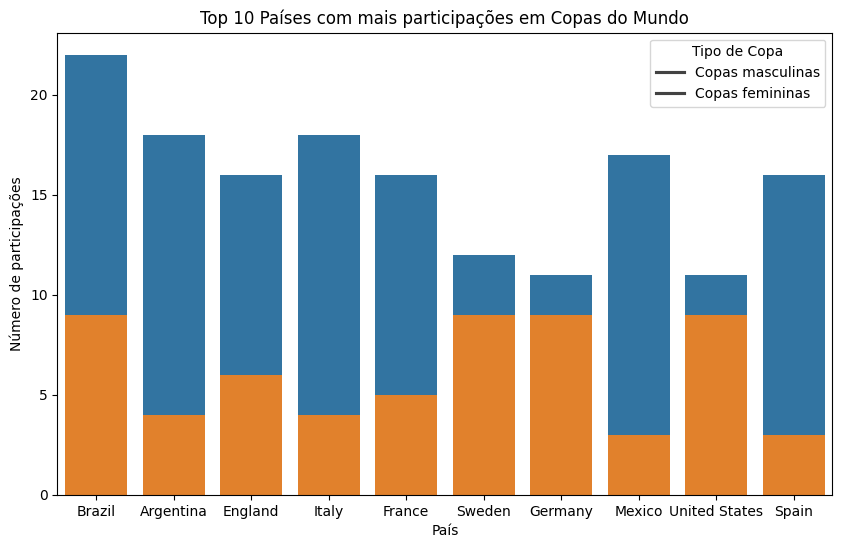

In [460]:
#### solução com seaborn
participacao_long = pt.melt(id_vars='país', value_vars=['participacoes_masculina', 'participacoes_feminina'], 
                                           var_name='Tipo de Copa', value_name='Participações')

plt.figure(figsize=(10, 6))
sns.barplot(data=participacao_long, x='país', y='Participações', hue='Tipo de Copa', dodge=False)
plt.title('Top 10 Países com mais participações em Copas do Mundo')
plt.xlabel('País')
plt.ylabel('Número de participações')
plt.legend(title='Tipo de Copa', labels=['Copas masculinas', 'Copas femininas'])
plt.show()

#Não consegui o gráfico com as particiáções somadas, as barras está apenas sobrepostas

In [461]:
#### solução com plotly
fig = px.bar(pt, x='país', y=[pt['participacoes_masculina'], pt['participacoes_feminina']],
              title='Top 10 países com mais participações em Copa do Mundo',
              labels={'value':"Número de participações", 'variable':'Tipo de copa'},
              color_discrete_map={'participacoes_masculina': 'blue', 'participacoes_feminina': 'orange'})
fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

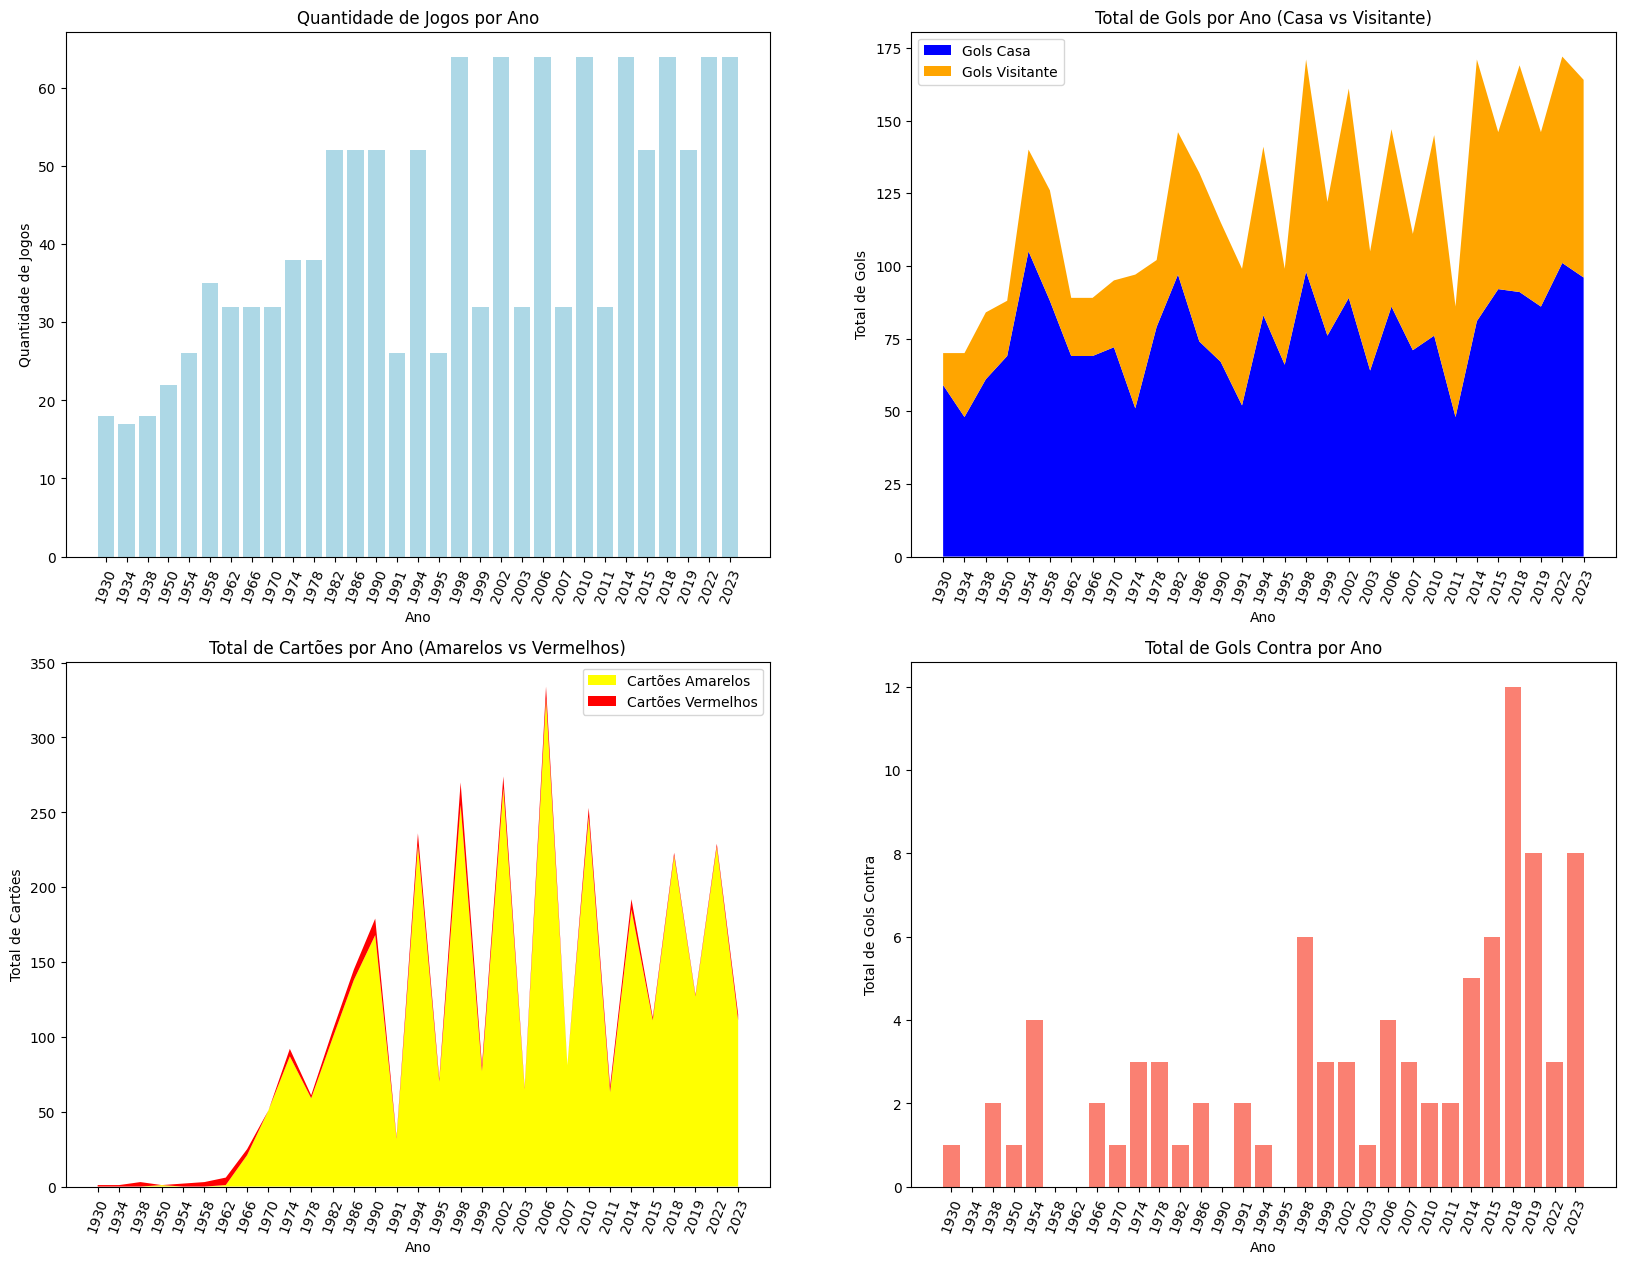

In [462]:

jogos_por_ano = wc.groupby('ano').size()
gols_por_ano = wc.groupby('ano')[['gols_1', 'gols_2']].sum()

def contar_cartoes(cartoes):
    if pd.isna(cartoes):
        return 0
    lista_cartoes = cartoes.split(',')
    return len(lista_cartoes)

wc['num_cartoes_amarelos1'] = wc['cartao_amarelo_1'].apply(contar_cartoes)
wc['num_cartoes_amarelos2'] = wc['cartao_amarelo_2'].apply(contar_cartoes)
wc['num_cartoes_vermelhos1'] = wc['cartao_vermelho_1'].apply(contar_cartoes)
wc['num_cartoes_vermelhos2'] = wc['cartao_vermelho_2'].apply(contar_cartoes)

wc['cartoes_amarelos_total'] = wc['num_cartoes_amarelos1'] + wc['num_cartoes_amarelos2']
wc['cartoes_vermelhos_total'] = wc['num_cartoes_vermelhos1'] + wc['num_cartoes_vermelhos2']

cartoes_por_ano = wc.groupby('ano')[['cartoes_amarelos_total', 'cartoes_vermelhos_total']].sum()

def contar_golcontra(gols):
    if pd.isna(gols):
        return 0
    lista_gols = gols.split('|')
    return len(lista_gols)

wc['num_gols_contra1']=wc['gols_1_contra'].apply(contar_golcontra)
wc['num_gols_contra2']=wc['gols_2_contra'].apply(contar_golcontra)
wc['gols_contra']=wc['num_gols_contra1']+wc['num_gols_contra2']

gols_contra_por_ano=wc.groupby('ano')['gols_contra'].sum()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# grafico 1
axes[0, 0].bar(jogos_por_ano.index.astype(str), jogos_por_ano.values, color='lightblue')
axes[0, 0].set_title('Quantidade de Jogos por Ano')
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Quantidade de Jogos')
axes[0, 0].tick_params(axis='x', rotation=70)

# grafico 2
axes[0, 1].stackplot(gols_por_ano.index.astype(str), gols_por_ano['gols_1'], gols_por_ano['gols_2'], labels=['Gols Casa', 'Gols Visitante'], colors=['blue', 'orange'])
axes[0, 1].set_title('Total de Gols por Ano (Casa vs Visitante)')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Total de Gols')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=70)

# grafico 3
amarelos = cartoes_por_ano['cartoes_amarelos_total']
vermelhos = cartoes_por_ano['cartoes_vermelhos_total']
axes[1, 0].stackplot(cartoes_por_ano.index.astype(str), amarelos, vermelhos, labels=['Cartões Amarelos', 'Cartões Vermelhos'], colors=['yellow', 'red'])
axes[1, 0].set_title('Total de Cartões por Ano (Amarelos vs Vermelhos)')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Total de Cartões')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=70)

# grafico 4
axes[1, 1].bar(gols_contra_por_ano.index.astype(str), gols_contra_por_ano.values, color='salmon')
axes[1, 1].set_title('Total de Gols Contra por Ano')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Total de Gols Contra')
axes[1, 1].tick_params(axis='x', rotation=70)

plt.show()